# Digit Recognizer

Reference: 
- https://pythondata.com/comparing-machine-learning-methods/
- http://yann.lecun.com/exdb/mnist/ (accuracy of various models on the dataset)



In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
import warnings
# warnings.filterwarnings("ignore")

# Importing librararies for data pre-processing
from sklearn.model_selection import train_test_split

'''
# Importing libraries for machine learning (without neural network)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
'''
# Importing libraries for deep learning (CNN)
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

from keras.utils import to_categorical

# Importing libraries for evaluation
from sklearn import metrics


Using TensorFlow backend.


In [2]:
FILEPATH_train = 'C:\\Users\\sameer.rai\\Desktop\\Jupyter Notebooks\\Digit Recognizer\\Data\\train.csv'
FILEPATH_test = 'C:\\Users\\sameer.rai\\Desktop\\Jupyter Notebooks\\Digit Recognizer\\Data\\test.csv'

In [3]:
train_data = pd.read_csv(FILEPATH_train)

In [4]:
train_data.shape

(42000, 785)

In [5]:
# Extracting features and labels
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

In [6]:
# Reshaping the array for plotting
X_reshaped = np.reshape(X, (42000,28,28))

#### Data understanding

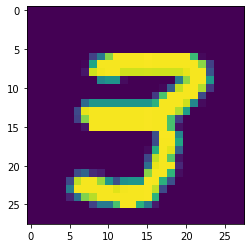

In [7]:
# Plotting sample inputs
plt.imshow(X_reshaped[2000])
plt.show()

In [8]:
# Dividing the dataset into training and cv set using pandas
# train_set = train_data.sample(frac = 0.2, random_state = 0.0)
# cv_set = train_data.drop(train_set.index)


### Data preparation for modelling

In [9]:
# Extracting features and lables for traning dataset
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

# Dividing the dataset into training and cv set using much better method, sklearn train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, train_size = 0.8, random_state = 10)

# Scaling X_train and X_cv
X_train = X_train/255.0
X_cv = X_cv/255.0

# One hot encoding of y_train and y_cv
y_train = to_categorical(y_train)
y_cv = to_categorical(y_cv)

### Modelling

#### Simple neural network
Model based on simple neural network 

##### One input, one hidden dense and one output layer

In [10]:
# Defining the parameters of neural network architecture
num_units_HL = 256

In [11]:
# Architecture of the neural network
model_oneHL = Sequential()
model_oneHL.add(Dense(num_units_HL, activation = 'relu', input_shape = (784,)))
model_oneHL.add(Dense(10, activation = 'softmax'))

In [12]:
# Summary of the model
model_oneHL.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the network
model_oneHL.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Training the network
oneHL_model = model_oneHL.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_cv, y_cv))


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 54us/step - loss: 0.6206 - accuracy: 0.8399 - val_loss: 0.3052 - val_accuracy: 0.9146
Epoch 2/20
33600/33600 [==============================] - 1s 26us/step - loss: 0.2629 - accuracy: 0.9256 - val_loss: 0.2342 - val_accuracy: 0.9365
Epoch 3/20
33600/33600 [==============================] - 1s 27us/step - loss: 0.2047 - accuracy: 0.9431 - val_loss: 0.1977 - val_accuracy: 0.9440
Epoch 4/20
33600/33600 [==============================] - 1s 24us/step - loss: 0.1689 - accuracy: 0.9534 - val_loss: 0.1688 - val_accuracy: 0.9502
Epoch 5/20
33600/33600 [==============================] - 1s 23us/step - loss: 0.1430 - accuracy: 0.9605 - val_loss: 0.1478 - val_accuracy: 0.9573
Epoch 6/20
33600/33600 [==============================] - 1s 23us/step - loss: 0.1230 - accuracy: 0.9667 - val_loss: 0.1349 - val_accuracy: 0.9602
Epoch 7/20
33600/33600 [==============================] - 1s 22us/st

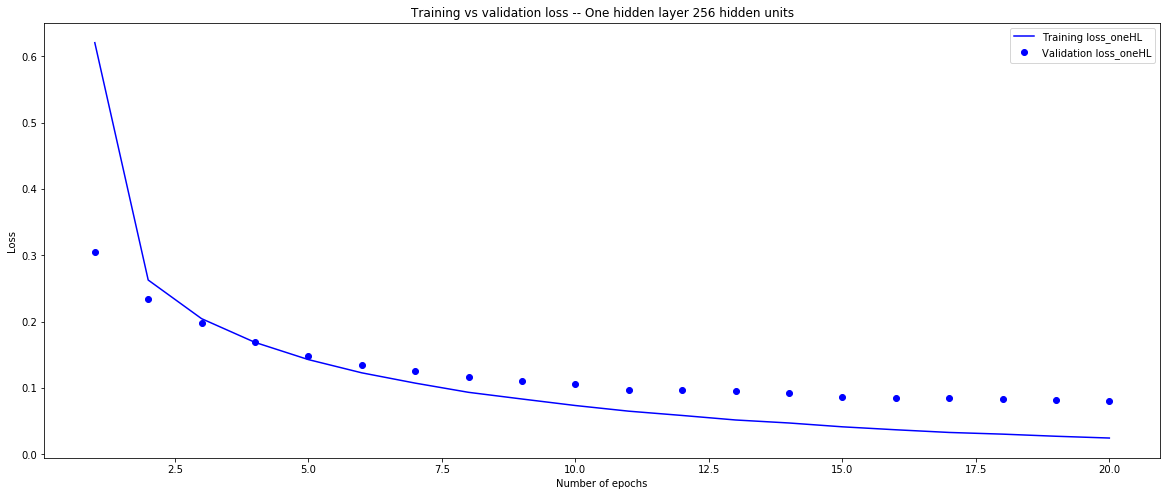

In [15]:
# Plotting the losses of model
# oneHL_model.history.keys()
training_loss_oneHL = oneHL_model.history['loss']
validation_loss_oneHL = oneHL_model.history['val_loss']

epochs = range(1, len(training_loss_oneHL) + 1)

plt.figure(figsize = (20, 8))
plt.plot(epochs, training_loss_oneHL, 'b', label = 'Training loss_oneHL')
plt.plot(epochs, validation_loss_oneHL, 'bo', label = 'Validation loss_oneHL')
plt.title('Training vs validation loss -- One hidden layer 256 hidden units')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

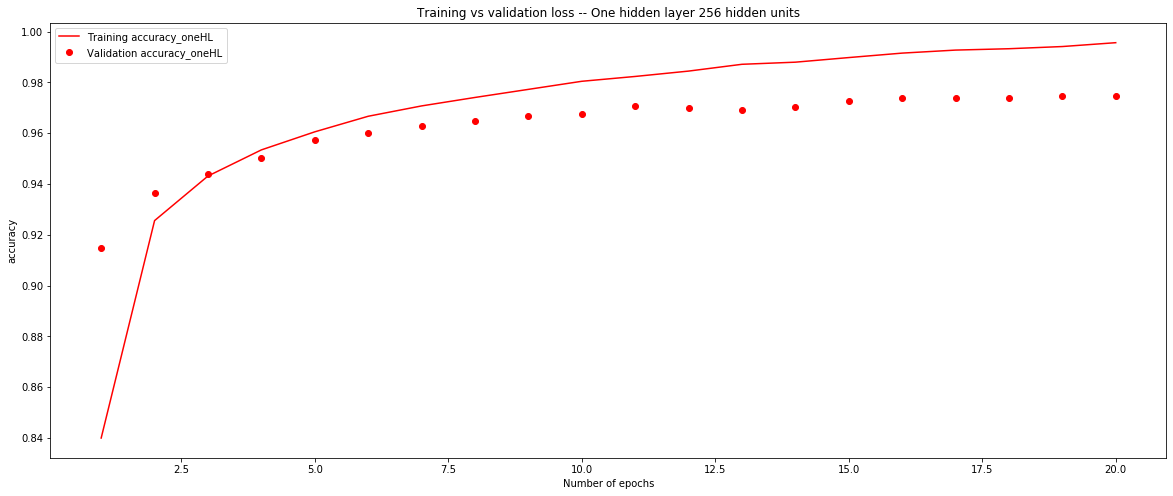

In [16]:
# Plotting the accuracy of model
# oneHL_model.history.keys()
training_accuracy_oneHL = oneHL_model.history['accuracy']
validation_accuracy_oneHL = oneHL_model.history['val_accuracy']

epochs = range(1, len(training_accuracy_oneHL) + 1)

plt.figure(figsize = (20, 8))
plt.plot(epochs, training_accuracy_oneHL, 'r', label = 'Training accuracy_oneHL')
plt.plot(epochs, validation_accuracy_oneHL, 'ro', label = 'Validation accuracy_oneHL')
plt.title('Training vs validation loss -- One hidden layer 256 hidden units')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

##### One input, two hidden dense and one output layer

In [17]:
# Defining the parameters of neural network architecture
num_units_1HH = 256
num_units_2HH = 64

In [18]:
# Creating the architecture of the model
model_twoHL = Sequential()
model_twoHL.add(Dense(num_units_1HH, activation = 'relu', input_shape = (784,)))
model_twoHL.add(Dense(num_units_2HH, activation = 'relu'))
model_twoHL.add(Dense(10, activation = 'softmax'))

In [19]:
# Summary of the model
model_twoHL.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the model
model_twoHL.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
# Training the model
twoHL_model = model_twoHL.fit(X_train, y_train, epochs = 20, batch_size = 512, validation_data = (X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 62us/step - loss: 0.6440 - accuracy: 0.8206 - val_loss: 0.2803 - val_accuracy: 0.9151
Epoch 2/20
33600/33600 [==============================] - 1s 25us/step - loss: 0.2275 - accuracy: 0.9350 - val_loss: 0.1965 - val_accuracy: 0.9424
Epoch 3/20
33600/33600 [==============================] - 1s 24us/step - loss: 0.1680 - accuracy: 0.9528 - val_loss: 0.1552 - val_accuracy: 0.9535
Epoch 4/20
33600/33600 [==============================] - ETA: 0s - loss: 0.1305 - accuracy: 0.96 - 1s 25us/step - loss: 0.1302 - accuracy: 0.9627 - val_loss: 0.1340 - val_accuracy: 0.9582
Epoch 5/20
33600/33600 [==============================] - 1s 25us/step - loss: 0.1047 - accuracy: 0.9705 - val_loss: 0.1199 - val_accuracy: 0.9618
Epoch 6/20
33600/33600 [==============================] - 1s 24us/step - loss: 0.0859 - accuracy: 0.9757 - val_loss: 0.1083 - val_accuracy: 0.9664
Epoch 7/20
33600/33600 [===

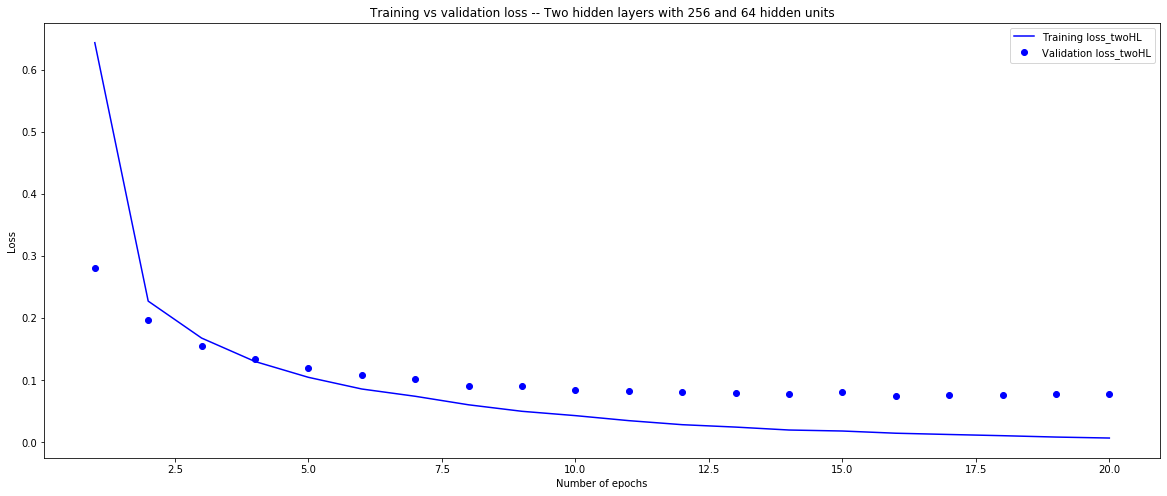

In [22]:
# Plotting the losses of model
# towHL_model.history.keys()
training_loss_twoHL = twoHL_model.history['loss']
validation_loss_twoHL = twoHL_model.history['val_loss']

epochs = range(1, len(training_loss_twoHL) + 1)

plt.figure(figsize = (20, 8))
plt.plot(epochs, training_loss_twoHL, 'b', label = 'Training loss_twoHL')
plt.plot(epochs, validation_loss_twoHL, 'bo', label = 'Validation loss_twoHL')
plt.title('Training vs validation loss -- Two hidden layers with 256 and 64 hidden units')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

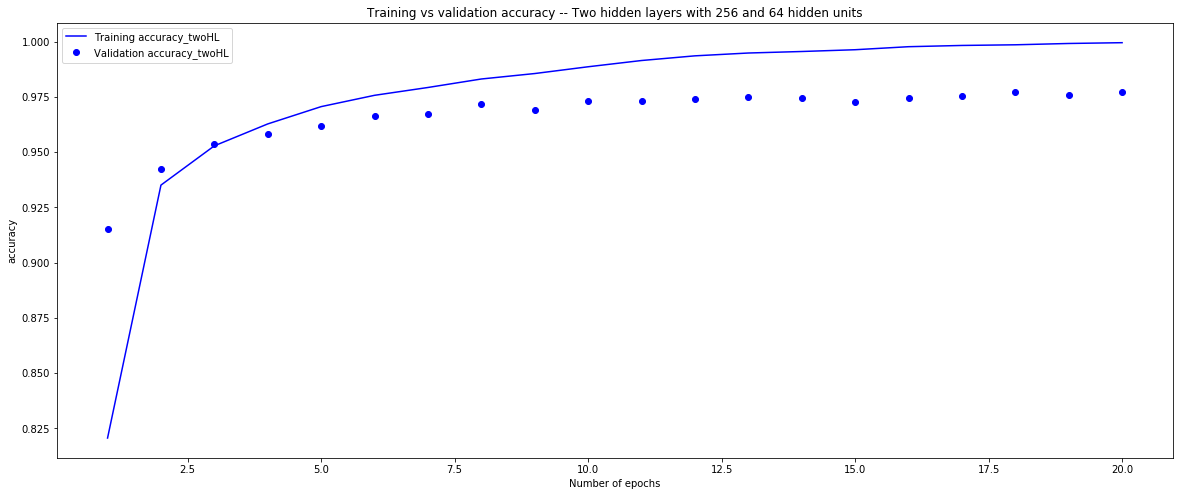

In [23]:
# Plotting the accuracy of model
# towHL_model.history.keys()
training_accuracy_twoHL = twoHL_model.history['accuracy']
validation_accuracy_twoHL = twoHL_model.history['val_accuracy']

epochs = range(1, len(training_accuracy_twoHL) + 1)

plt.figure(figsize = (20, 8))
plt.plot(epochs, training_accuracy_twoHL, 'b', label = 'Training accuracy_twoHL')
plt.plot(epochs, validation_accuracy_twoHL, 'bo', label = 'Validation accuracy_twoHL')
plt.title('Training vs validation accuracy -- Two hidden layers with 256 and 64 hidden units')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

#### Convolutional neural network
Model based on CNN 

##### Data preparation for CNN input
For CNN the input shape needs to be in form (a, b, c). It includes the size of the image and number of chanels.

In [24]:
# Extracting features and labels
X_CNN = train_data.iloc[:, 1:].values
y_CNN = train_data.iloc[:, 0].values

X_CNN_reshaped = np.reshape(X_CNN, (42000,28,28,1))

In [25]:
# Creating training and validation set
# Dividing the dataset into training and cv set using much better method, sklearn train_test_split
X_train_CNN, X_cv_CNN, y_train_CNN, y_cv_CNN = train_test_split(X_CNN_reshaped, y_CNN, train_size = 0.8, random_state = 10)

# Scaling X_train and X_cv
X_train_CNN = X_train_CNN/255.0
X_cv_CNN = X_cv_CNN/255.0

# One hot encoding of y_train and y_cv
y_train_CNN = to_categorical(y_train_CNN)
y_cv_CNN = to_categorical(y_cv_CNN)

##### One input, one CNN, one max pool, one flatten, one hidden and one output layer

In [26]:
# Architcture of the network
model_oneCNN = Sequential()
model_oneCNN.add(Conv2D(filters = 16, kernel_size = 2, activation = 'relu', data_format = 'channels_last', input_shape = (28, 28, 1)))
model_oneCNN.add(MaxPooling2D(pool_size = (2, 2)))
model_oneCNN.add(Flatten())
model_oneCNN.add(Dense(256, activation = 'relu'))
model_oneCNN.add(Dense(10, activation = 'softmax'))

In [27]:
model_oneCNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               692480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 695,130
Trainable params: 695,130
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compiling the model
model_oneCNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
# Training the model
oneCNN_model = model_oneCNN.fit(X_train_CNN, y_train_CNN, epochs = 20, batch_size = 512, validation_data = (X_cv_CNN, y_cv_CNN))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 10s 311us/step - loss: 0.5790 - accuracy: 0.8476 - val_loss: 0.2787 - val_accuracy: 0.9173
Epoch 2/20
33600/33600 [==============================] - 5s 154us/step - loss: 0.2269 - accuracy: 0.9352 - val_loss: 0.1951 - val_accuracy: 0.9446
Epoch 3/20
33600/33600 [==============================] - 5s 150us/step - loss: 0.1673 - accuracy: 0.9515 - val_loss: 0.1509 - val_accuracy: 0.9550
Epoch 4/20
33600/33600 [==============================] - 6s 184us/step - loss: 0.1301 - accuracy: 0.9629 - val_loss: 0.1286 - val_accuracy: 0.9612
Epoch 5/20
33600/33600 [==============================] - 8s 230us/step - loss: 0.1040 - accuracy: 0.9706 - val_loss: 0.1068 - val_accuracy: 0.9673
Epoch 6/20
33600/33600 [==============================] - 6s 177us/step - loss: 0.0851 - accuracy: 0.9771 - val_loss: 0.0905 - val_accuracy: 0.9723
Epoch 7/20
33600/33600 [==============================] - 6s 1

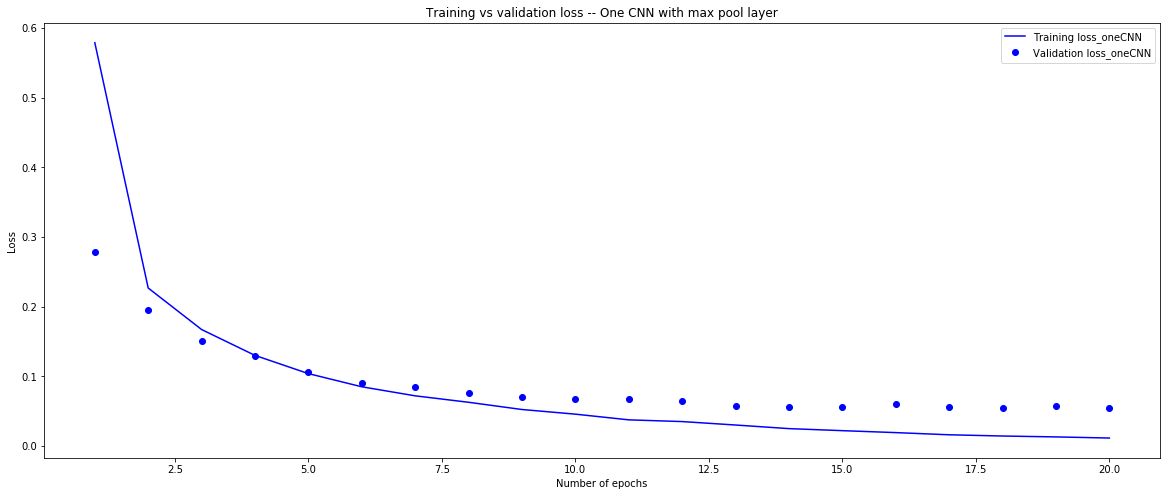

In [30]:
# Plotting the losses of model
training_loss_oneCNN = oneCNN_model.history['loss']
validation_loss_oneCNN = oneCNN_model.history['val_loss']

epochs = range(1, len(training_loss_oneCNN) + 1)

plt.figure(figsize = (20, 8))
plt.plot(epochs, training_loss_oneCNN, 'b', label = 'Training loss_oneCNN')
plt.plot(epochs, validation_loss_oneCNN, 'bo', label = 'Validation loss_oneCNN')
plt.title('Training vs validation loss -- One CNN with max pool layer')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

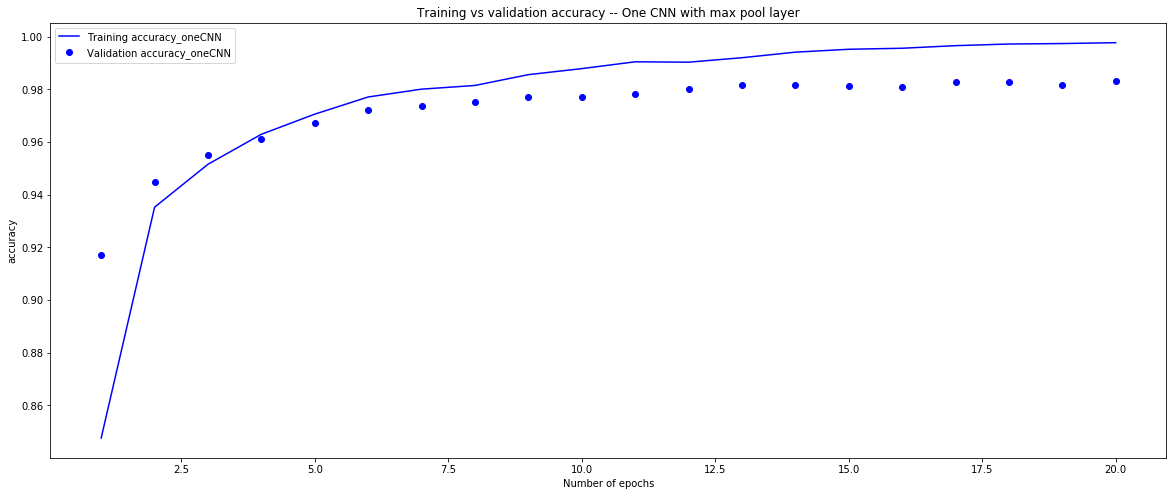

In [31]:
# Plotting the accuracy of model
training_accuracy_oneCNN = oneCNN_model.history['accuracy']
validation_accuracy_oneCNN = oneCNN_model.history['val_accuracy']

epochs = range(1, len(training_accuracy_oneCNN) + 1)

plt.figure(figsize = (20, 8))
plt.plot(epochs, training_accuracy_oneCNN, 'b', label = 'Training accuracy_oneCNN')
plt.plot(epochs, validation_accuracy_oneCNN, 'bo', label = 'Validation accuracy_oneCNN')
plt.title('Training vs validation accuracy -- One CNN with max pool layer')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

##### One input, two CNN, two max pool, one flatten, one hidden and one output layer

In [32]:
# Architecture of the model
model_twoCNN = Sequential()
# 1st layer of CNN (2,2) kernel and 16 filters with maxpool
model_twoCNN.add(Conv2D(filters = 16, kernel_size = (2,2), activation = 'relu', data_format = 'channels_last', input_shape = (28, 28, 1)))
model_twoCNN.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd layer of CNN (2,2) kernel and 32 filters with maxpool
model_twoCNN.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu'))
model_twoCNN.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening and Dense layer 
model_twoCNN.add(Flatten())
model_twoCNN.add(Dense(256, activation = 'relu'))
                 
# Output layer
model_twoCNN.add(Dense(10, activation = 'softmax'))
                 

In [33]:
# Summary of the model
model_twoCNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [34]:
# Compiling the model
model_twoCNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
# Training the model
twoCNN_model = model_twoCNN.fit(X_train_CNN, y_train_CNN, epochs = 20, batch_size = 512, validation_data = (X_cv_CNN, y_cv_CNN))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 6s 166us/step - loss: 0.6909 - accuracy: 0.8221 - val_loss: 0.2594 - val_accuracy: 0.9236
Epoch 2/20
33600/33600 [==============================] - 6s 172us/step - loss: 0.2013 - accuracy: 0.9406 - val_loss: 0.1498 - val_accuracy: 0.9562
Epoch 3/20
33600/33600 [==============================] - 6s 168us/step - loss: 0.1249 - accuracy: 0.9638 - val_loss: 0.1025 - val_accuracy: 0.9693
Epoch 4/20
33600/33600 [==============================] - 5s 162us/step - loss: 0.0933 - accuracy: 0.9728 - val_loss: 0.0834 - val_accuracy: 0.9727
Epoch 5/20
33600/33600 [==============================] - 5s 163us/step - loss: 0.0774 - accuracy: 0.9767 - val_loss: 0.0747 - val_accuracy: 0.9756
Epoch 6/20
33600/33600 [==============================] - 6s 166us/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0704 - val_accuracy: 0.9769
Epoch 7/20
33600/33600 [==============================] - 6s 16

In [36]:
# Plotting the losses of model

In [37]:
# Plotting the accuracy of model

#### Comparing accuracy of four models

In [38]:
# Accuracy of all four models on training set
accuracy_training = {
    'One dense layer': model_oneHL.evaluate(X_train, y_train)[1],
    'Two dense layers': model_twoHL.evaluate(X_train, y_train)[1],
    'One CNN layer': model_oneCNN.evaluate(X_train_CNN, y_train_CNN)[1],
    'Two CNN layers': model_twoCNN.evaluate(X_train_CNN, y_train_CNN)[1]
}

# Accuracy of all four models on validation set
accuracy_validation = {
    'One dense layer': model_oneHL.evaluate(X_cv, y_cv)[1],
    'Two dense layers': model_twoHL.evaluate(X_cv, y_cv)[1],
    'One CNN layer': model_oneCNN.evaluate(X_cv_CNN, y_cv_CNN)[1],
    'Two CNN layers': model_twoCNN.evaluate(X_cv_CNN, y_cv_CNN)[1]
}


8400/8400 [==============================] - 1s 66us/step


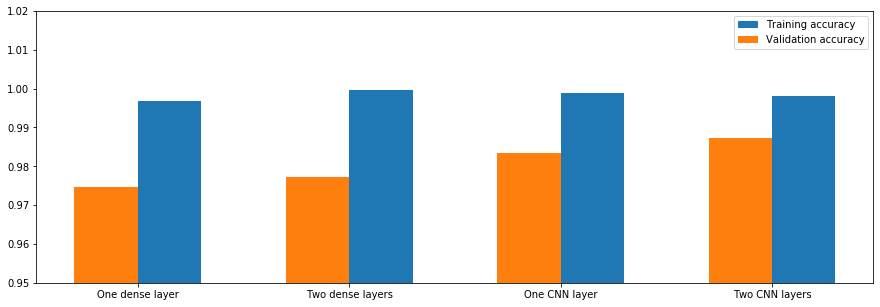

In [39]:
# Plotting the accuracy 
plt.figure(figsize = (15, 5))
plt.bar(x = accuracy_validation.keys(), height = accuracy_training.values(), width = 0.3, align = 'edge', label = 'Training accuracy')
plt.bar(x = accuracy_validation.keys(), height = accuracy_validation.values(), width = -0.3, align = 'edge', label = 'Validation accuracy')
plt.ylim(ymin=.95, ymax = 1.02)
plt.legend()
plt.show()

In [54]:
# Testing on the test set for submission using model with two CNN layers
test_data = pd.read_csv(FILEPATH_test)
print("There are {} rows and {} columns in test data.".format(test_data.shape[0], test_data.shape[1]))

There are 28000 rows and 784 columns in test data.


In [55]:
# Since we are using CNN model, the input date needs to be reshaped to (28,28) and normalizing
test_CNN = np.reshape(test_data.values, (28000, 28, 28, 1))/255

In [48]:
# Predicting the resutls on test set
predictions = model_twoCNN.predict(test_CNN)
digit_pred = np.argmax(predictions, axis=1)

In [72]:
# Verifying the predictions and associated digits
validate = 5000
print(predictions[validate])
print(digit_pred[validate])

[3.4859617e-08 9.9982184e-01 1.1217442e-07 7.7231942e-07 1.5169551e-04
 4.0306014e-07 2.6395000e-08 1.6317843e-05 1.7255881e-07 8.5996944e-06]
1


In [74]:
# Creating the submission file
results = pd.Series(digit_pred, name='Label')
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), results], axis=1)

In [76]:
submission.to_csv("TwoCNN_MNIST_datagen.csv",index=False)